# Espacios de color

Manipulación y cambio de espacio

In [1]:
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [3]:
# Veamos las transformaciones posibles
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
for flag in flags:
    print(flag)

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_BGGR2BGR
COLOR_BAYER_BGGR2BGRA
COLOR_BAYER_BGGR2BGR_EA
COLOR_BAYER_BGGR2BGR_VNG
COLOR_BAYER_BGGR2GRAY
COLOR_BAYER_BGGR2RGB
COLOR_BAYER_BGGR2RGBA
COLOR_BAYER_BGGR2RGB_EA
COLOR_BAYER_BGGR2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GBRG2BGR
COLOR_BAYER_GBRG2BGRA
COLOR_BAYER_GBRG2BGR_EA
COLOR_BAYER_GBRG2BGR_VNG
COLOR_BAYER_GBRG2GRAY
COLOR_BAYER_GBRG2RGB
COLOR_BAYER_GBRG2RGBA
COLOR_BAYER_GBRG2RGB_EA
COLOR_BAYER_GBRG2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_GRBG2BGR
COL

### Ejercicio: Separar la mesa (color verde) del resto de la escena

![image](imgBloque1.bmp)

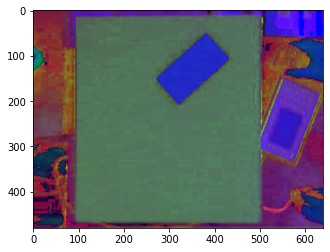

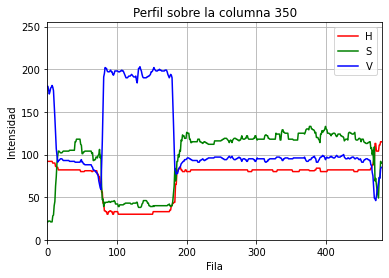

In [4]:
# Primera parte: encontrar un espacio de color conveniente para la discriminación

img_color = cv.imread('imgBloque1.bmp')

# Convertir la imagen a HSV
imgHSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure()
plt.imshow(imgHSV)
plt.show()

# Graficar los perfiles de intensidad de cada canal
plt.figure()
idx_col = 350
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()


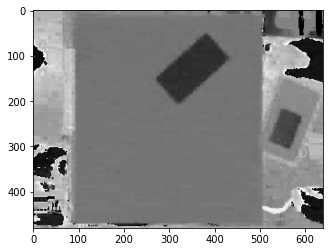

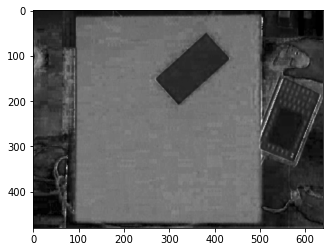

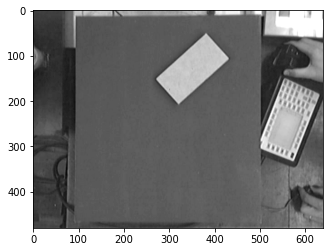

In [5]:
im_h, im_s, im_v = cv.split(imgHSV)
plt.figure()
# La curva de Hue, discrimina fácilmente el color del tablero de los colores del fondo
plt.imshow(im_h, cmap='gray')
plt.show()
plt.figure()
# Puedo complementar con la curva de saturación, ya que ambas son muy uniformes sobre el tablero
plt.imshow(im_s,cmap='gray')
plt.show()
plt.figure()
# La imagen de intensidad (V) permite discriminar fácilmente el bloque del tablero, pero confunde el tablero con el fondo
plt.imshow(im_v,cmap='gray')
plt.show()


Media de H: 31.7584


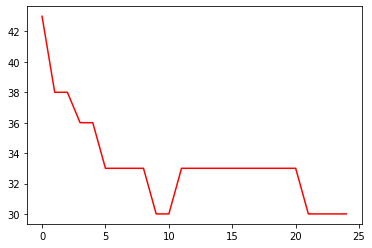

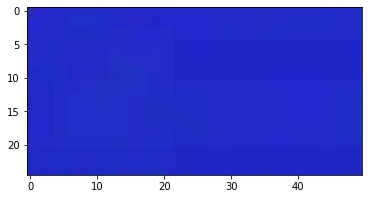

In [12]:
# Voy a trabajar con una muestra del objeto encima del tablero
muestra_objeto = imgHSV[125:150, 300:350, :]

color_h_medio, _, _ = np.mean(muestra_objeto, axis=(0,1))
print('Media de H: {}'.format(color_h_medio))

muestra = cv.cvtColor(muestra_objeto, cv.COLOR_HSV2BGR)
#muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.plot(muestra_objeto[:, 0, 0].flatten(), color='r', label='H')
plt.show()

plt.figure()
plt.imshow(muestra_objeto)
plt.show()

Media: H=81.47 	 S=121.07 	 V=94.35
Desvio: H=0.92 	 S=3.98 	 V=1.66


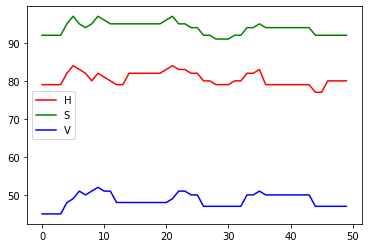

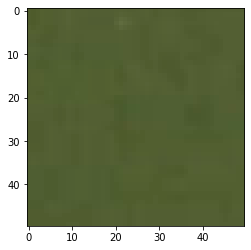

In [22]:
# Hacemos una descripcion estadistica
# Vamos a tomar un pedazo de la imagen y calcular la media de cada canal
# La idea es tomar una muestra del tablero
muestra = imgHSV[300:350, 300:350, :]

color_h_medio, color_s_medio, color_v_medio = np.mean(muestra, axis=(0,1))
color_h_std, color_s_std, color_v_std = np.std(muestra, axis=(0,1))
print('Media: H={:.2f} \t S={:.2f} \t V={:.2f}'.format(color_h_medio, color_s_medio, color_v_medio))
print('Desvio: H={:.2f} \t S={:.2f} \t V={:.2f}'.format(color_h_std, color_s_std, color_v_std))

muestra = cv.cvtColor(muestra, cv.COLOR_HSV2BGR)
#muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.plot(muestra[:, 0, 0].flatten(), color='r', label='H')
plt.plot(muestra[:, 0, 1].flatten(), color='g', label='S')
plt.plot(muestra[:, 0, 2].flatten(), color='b', label='V')
plt.legend()
plt.show()

plt.figure()
plt.imshow(muestra)
plt.show()

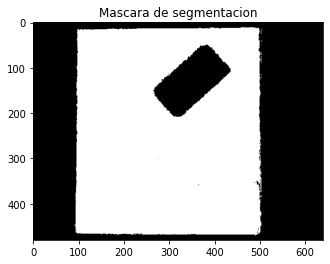

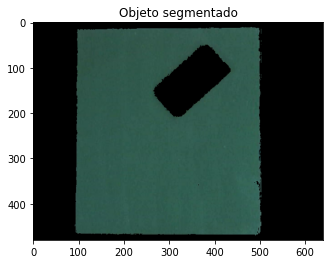

In [29]:
# Hay que definir el rango del color (en el espacio HSV) que se quiere segmentar
# Con la media sacada para el H
num_std = 9
color_l = (color_h_medio-num_std*color_h_std, color_s_medio-num_std*color_s_std, color_v_medio-num_std*color_v_std)
color_u = (color_h_medio+num_std*color_h_std, color_s_medio+num_std*color_s_std, color_v_medio+num_std*color_v_std)

mask = cv.inRange(imgHSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()

hue medio:81.472


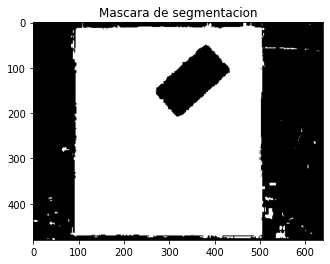

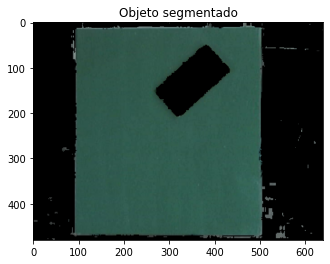

In [15]:
print(f'hue medio:{color_h_medio}')

# Hay que definir el rango del color (en el espacio HSV) que se quiere segmentar
# Con la media sacada para el H
color_l = (color_h_medio-10, 10, 10)
color_u = (color_h_medio+10, 150, 150)

mask = cv.inRange(imgHSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()